# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [6]:
# Driver 1 enter codes here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [15]:
fitbit_m_s = fitbit.groupby(by="Months_encoded").agg({"Steps":"mean"})
fitbit_m_s

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


<AxesSubplot:xlabel='Months_encoded'>

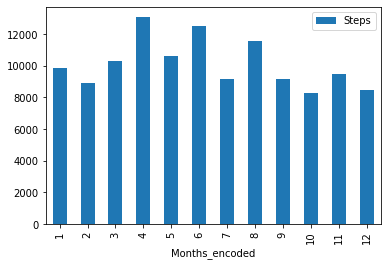

In [16]:
fitbit_m_s.plot(kind="bar")

## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Steps'>

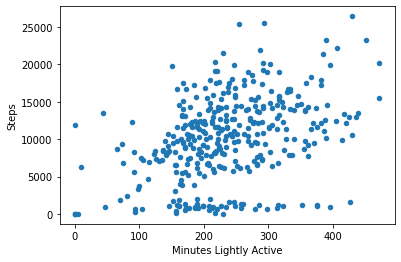

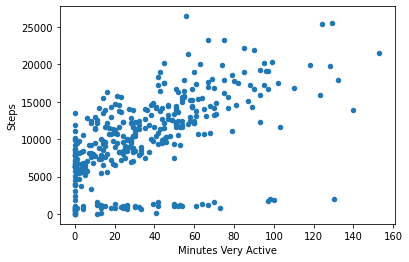

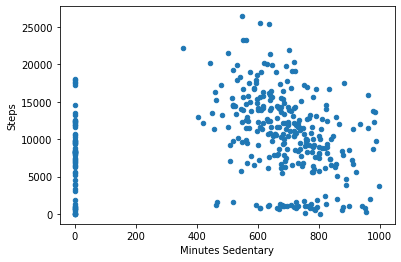

In [23]:
# Driver 2 enter codes here
fitbit.plot.scatter(x = 'Minutes Lightly Active', y = 'Steps')
fitbit.plot.scatter(x = 'Minutes Very Active', y = 'Steps')
fitbit.plot.scatter(x = 'Minutes Sedentary', y = 'Steps')

In [24]:
for dots in fitbit.values():
    fitbit.plot.scatter(x = 'Minutes Lightly Active', y = 'Steps')
    fitbit.plot.scatter(x = 'Minutes Very Active', y = 'Steps')
    fitbit.plot.scatter(x = 'Minutes Sedentary', y = 'Steps')

TypeError: 'numpy.ndarray' object is not callable